In [1]:
# required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

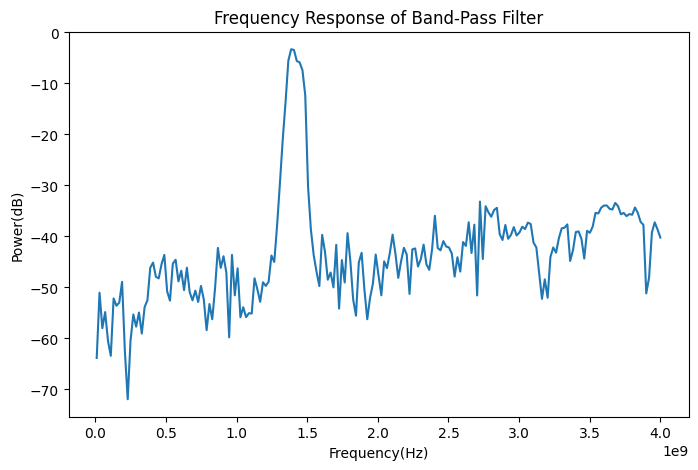

In [2]:
df =  pd.read_csv('default.csv', delimiter="\t")
plt.figure(figsize=(8,5))
plt.plot(df['Frequency'], df['S21-Magnitude (dB)'])
plt.xlabel("Frequency(Hz)")
plt.ylabel("Power(dB)")
plt.title('Frequency Response of Band-Pass Filter')
plt.savefig('FrequencyResponse.png');

In [3]:
# required function
def lorentzian(x, x0, gamma, A):
    return A * (1/np.pi) * (gamma / ((x - x0)**2 + gamma**2))

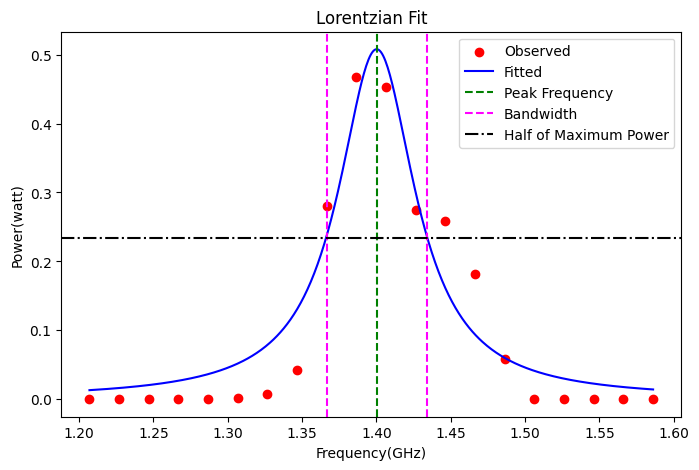

In [4]:
s=60
e=80
Frequency = df['Frequency'][s:e]
Power = df['S21-Magnitude (dB)'][s:e]

# Scaling the data
Power_linear = 10**(Power/10) # Linear Scale
Frequency_norm = Frequency/(10**9) # Normalizing it to GHz

# Curve fitting
ic = [1.4, 0.05, 0.09]
params,_ = curve_fit(lorentzian, Frequency_norm, Power_linear, p0=ic)
pred_freq = np.linspace(min(Frequency_norm), max(Frequency_norm), 500)
pred_power_lin = lorentzian(pred_freq, params[0], params[1], params[2])

# Plots
plt.figure(figsize=(8,5))
plt.scatter(Frequency_norm, Power_linear, label='Observed', color='red')
plt.plot(pred_freq, pred_power_lin, label='Fitted', color='blue')
plt.axvline(params[0],label='Peak Frequency', color='green', linestyle='--')
eps = 0.002
plt.axvline(params[0]-params[1]-eps, label='Bandwidth', color='magenta', linestyle='--')
plt.axvline(params[0]+params[1]+eps, color='magenta', linestyle='--')
plt.axhline(max(Power_linear)/2, color='black', label='Half of Maximum Power',linestyle='-.')
plt.xlabel("Frequency(GHz)")
plt.ylabel("Power(watt)")
plt.title("Lorentzian Fit")
plt.legend()
plt.savefig('LorentzianFit.png')

In [5]:
print(f"Peak Frequency:{pred_freq[np.argmax(pred_power_lin)]} GHz")
print(f"Bandwidth:{2*(params[1]+eps)} GHz")

Peak Frequency:1.3999432865731463 GHz
Bandwidth:0.06699034798497476 GHz
